#### For some actions, you may want to require human approval before running to ensure that everything is running as intended.

In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [3]:
llm.invoke("hi")

AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.001169199, 'queue_time': 0.25005624, 'total_time': 0.028441926}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c763a822-c35f-4fc1-93ec-171d71ae6ec1-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})

In [4]:
llm.invoke("hi").content

'Hi there! 👋 How can I help you today?\n'

In [5]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [6]:
multiply({"first_number":24,"second_number":364})

C:\Users\Acer NItro 5\AppData\Local\Temp\ipykernel_17180\2089873997.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":24,"second_number":364})


8736

In [7]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [8]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result

In [9]:
search("who is a current president of USA?")

C:\Users\Acer NItro 5\AppData\Local\Temp\ipykernel_17180\1922640126.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


[{'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\nThe 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] The vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform their duties. If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n\n### Current vice president\n\nThe 50th and current vice president of the United States is James David (JD) Vance. H

In [10]:
search.invoke("who is a current president of USA?")

[{'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\nThe 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] The vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform their duties. If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n\n### Current vice president\n\nThe 50th and current vice president of the United States is James David (JD) Vance. H

In [11]:
tools=[search,multiply]

In [12]:
model_with_tools = llm.bind_tools(tools)

In [13]:
tool_mapping={tool.name: tool for tool in tools}

In [14]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000278E7FB63E0>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000278E7FB5800>)}

In [15]:
response = model_with_tools.invoke("who is a current president of USA?")

In [16]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wfkdqggd5', 'function': {'arguments': '{"query":"current president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 1075, 'total_tokens': 1156, 'completion_time': 0.147272727, 'prompt_time': 0.020390383, 'queue_time': 0.253971896, 'total_time': 0.16766311}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cc71535d-bc89-42e9-b59c-5bde5c267570-0', tool_calls=[{'name': 'search', 'args': {'query': 'current president of USA'}, 'id': 'wfkdqggd5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1075, 'output_tokens': 81, 'total_tokens': 1156})

In [17]:
tool_details=response.additional_kwargs.get("tool_calls")

In [18]:
tool_details

[{'id': 'wfkdqggd5',
  'function': {'arguments': '{"query":"current president of USA"}',
   'name': 'search'},
  'type': 'function'}]

In [19]:
tool_details[0]["function"]["name"]

'search'

In [20]:
tool_details[0]["function"]["arguments"]

'{"query":"current president of USA"}'

In [21]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'current president of USA'}

In [22]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\nThe 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] The vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform their duties. If the vice president is not able to fulfill the duties of president, the role is passed to another leader in the order of presidential succession.\n\n### Current vice president\n\nThe 50th and current vice president of the United States is James David (JD) Vance. H

In [23]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [24]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [25]:
def invoke_tool(state:AgentState):
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}

In [26]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"

In [27]:
graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [28]:
graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END)

#graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [29]:
app = graph.compile()

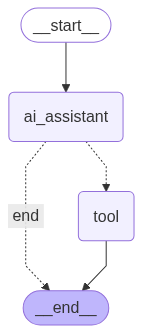

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'z2br6b5hd', 'function': {'arguments': '{"query":"upcoming president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 1074, 'total_tokens': 1156, 'completion_time': 0.149090909, 'prompt_time': 0.020344223, 'queue_time': 0.255999196, 'total_time': 0.169435132}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--afa54084-301d-4048-8c81-cfa11b56076b-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA'}, 'id': 'z2br6b5hd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1074, 'output_tokens': 82, 'total_tokens': 1156})]}
----
Selected tool: search
{'messages': [[{'title': 'United States presidential election of 2024', 'url': 'https://www.britannica.com/event/United-States-presidential-election-of

In [32]:
for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nd7rdysrx', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1079, 'total_tokens': 1170, 'completion_time': 0.165454545, 'prompt_time': 0.022574331, 'queue_time': 0.257833368, 'total_time': 0.188028876}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--53243842-eb1d-4d55-a00a-4597eaf4152b-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'nd7rdysrx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 91, 'total_tokens': 1170})]}
----
Selected tool: multiply
{'messages': [1058]}
----


In [33]:
for s in app.stream({"messages": ["what is the total amount of money exist over the earth?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '71gdsx3cq', 'function': {'arguments': '{"query":"what is the total amount of money exist over the earth"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1079, 'total_tokens': 1168, 'completion_time': 0.161818182, 'prompt_time': 0.025379051, 'queue_time': 0.253114399, 'total_time': 0.187197233}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ce55367f-6e09-49c0-97d0-5eb0249bdb15-0', tool_calls=[{'name': 'search', 'args': {'query': 'what is the total amount of money exist over the earth'}, 'id': '71gdsx3cq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 89, 'total_tokens': 1168})]}
----
Selected tool: search


Exception: web search discard

#### LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
tavily=TavilySearchResults()

In [ ]:
tools = [tavily]

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
memory = MemorySaver()

In [ ]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [ ]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [ ]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

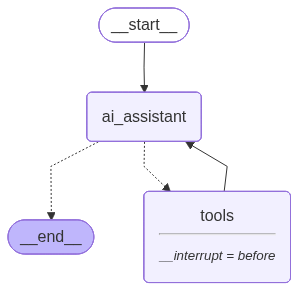

In [ ]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [ ]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (0pvxjpafr)
 Call ID: 0pvxjpafr
  Args:
    query: What is the current capital of India?


In [ ]:
snapshot = app2.get_state(config)

In [ ]:
snapshot.next

('tools',)

In [ ]:
last_message=snapshot.values["messages"][-1]

In [ ]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'What is the current capital of India?'},
  'id': '0pvxjpafr',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (0pvxjpafr)
 Call ID: 0pvxjpafr
  Args:
    query: What is the current capital of India?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "What is the capital of India? How the territory came to be, plus ...", "url": "https://www.yahoo.com/news/capital-india-territory-came-plus-130045224.html", "content": "The U.S. is third in line for the largest population by country but it's way behind China and India at about 335 million people.\n\nWant to learn more about the soon-to-be most populous country? Here’s some interesting information about how India is organized.\n\n## What is the capital of India?\n\nThe capital of India is New Delhi, located in the north-central part of the country to the west of the Yamuna River. [...] Calcutta (now Kolkata, the capital of West Bengal) was the country’s c

In [ ]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [ ]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (a7897w1jp)
 Call ID: a7897w1jp
  Args:
    query: Weather in New Delhi


In [ ]:
snapshot = app2.get_state(config)

In [ ]:
snapshot.next

('tools',)

In [ ]:
last_message=snapshot.values["messages"][-1]

In [ ]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'Weather in New Delhi'},
  'id': 'a7897w1jp',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

NameError: name 'events' is not defined

In [34]:
app2.get_state(config)

NameError: name 'app2' is not defined

In [35]:
snapshot=app2.get_state(config)

NameError: name 'app2' is not defined

In [36]:
snapshot.next

NameError: name 'snapshot' is not defined

In [37]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}

In [38]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

NameError: name 'app2' is not defined

In [39]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

NameError: name 'events' is not defined

In [ ]:
snapshot=app2.get_state(config)

In [ ]:
current_message = snapshot.values["messages"][-1]

In [ ]:
current_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  search (call_k054)
 Call ID: call_k054
  Args:
    query: recent news new delhi


In [ ]:
tool_call_id = current_message.tool_calls[0]["id"] 

In [ ]:
tool_call_id

'call_k054'

In [ ]:
from langchain_core.messages import AIMessage, ToolMessage

In [ ]:
answer = "it is just related to raining which is happing on daily basis"

In [ ]:
new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [ ]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efa3f9e-a414-6c0a-800e-b3cf9a8c9199'}}

In [ ]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={}, id='86ee0c6d-7771-4ed6-8bd2-242adace39be')]
